# Nearest Neighbour Classifier
***
Among the various methods of supervised statistical pattern recognition, the Nearest Neighbour rule achieves consistently high performance, without a-priori assumptions about the distributions from which the training examples are drawn. A new sample is classified by calculating the distance to the nearest training case.

This classifier is very rarely used in practice, but it will allow us to get an idea about the basic approach to an image classification problem.

### Problem 1: Classifying Points
***
Given some data points (in 2D space) with their color labels, design a NN classifier to assign a color label to the test point.

Given data points:

|Sno| Coordinates| Color|
|:---:| :----------: | :----: |
|1. | (1, 1)     | red  |
|2. | (2, 2.5)   | red  |
|3. | (3, 1.2)   | red  |
|4. | (5.5, 6.3) | blue |
|5. | (6, 9)     | blue |
|6. | (7, 6)     | blue |

Test data:

|Sno| Coordinates| Color| True Value |
|:---:| :----------: | :----: |:----:|
|1.   | (3, 4)       | ?      | red|







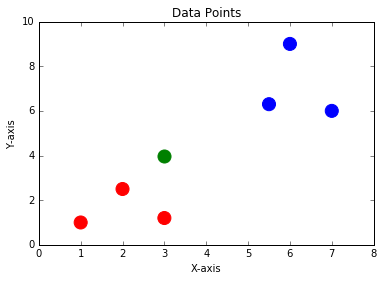

The test data point belongs to class with color:  red


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# define training data
training_data = np.array([[1,1], [2,2.5], [3,1.2], [5.5,6.3], [6,9], [7,6]])
training_labels = ['red', 'red', 'red', 'blue', 'blue', 'blue']

# define test data
test_data = [3, 4]

# Plot the training and test points
plt.figure()
plt.scatter(training_data[:, 0], training_data[:, 1], color = training_labels[:], s = 170)
plt.scatter(test_data[0], test_data[1], color = 'green', s = 170)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Data Points')
plt.show()

# define distance function
# L2 distance
def distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# Calculate the distance of test point from all the given data points
num = len(training_data)
dist = np.zeros(num)
for i in range(num):
    dist[i] = distance(test_data, training_data[i])

# Select the label of data point with minimum distance from test point
index = np.argmin(distance)
print('The test data point belongs to class with color: ', training_labels[index])

### Problem 2: Classifying Images:
***
Design a NN classifier to correctly identify digits from a dataset of tens of thousands of handwritten images.
Define two cases with different number of data values for training the model and output the accuracy of the model in each case.

**Given**: Use the [Digit dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html) : Sklearn is a Python modules for machine learning. This module comes with a few standard datasets, such as the digits dataset. This dataset is made up of 1797 8x8 images and contains two arrays _digits.images_ and _digits.target_.

Case 1: 100 data vales as training data <br>
Case 2: 1000 data values as training data

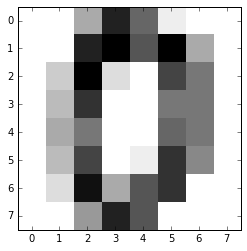

0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
digits = datasets.load_digits()

# plot the first digit and print it's target value
plt.figure()
plt.imshow(digits.images[0], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()
print(digits.target[0])

In [3]:
# define the distance function
# L2 distance
def distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

# define an accuracy function
def accuracy(e, total = 100):
    return str(100 - ((e / total) * 100)) + ' %'

In [4]:
# use first 100 images as training data
training_data = digits.data[0:100]
training_labels = digits.target[0:100]

# define a distance vector and error count
num = len(training_data)
dist = np.zeros(num)
errors = 0

# use random 100 values as testing data
for i in range(1597, 1697):
    test_data = digits.data[i]
    for j in range(num):
        dist[j] = distance(test_data, training_data[j])
    index = np.argmin(dist)
    label = training_labels[index]
    if label != digits.target[i]:
        errors += 1

print('Accuracy: {}'.format(accuracy(errors)))

Accuracy: 86.0 %


Increasing the training data set from 100 data values to 1000 data values:

In [5]:
# use first 1000 images as training data
training_data = digits.data[0:1000]
training_labels = digits.target[0:1000]

# define a distance vector and error count
num = len(training_data)
dist = np.zeros(num)
errors = 0

# use random 100 values as testing data
for i in range(1597, 1697):
    test_data = digits.data[i]
    for j in range(num):
        dist[j] = distance(test_data, training_data[j])
    index = np.argmin(dist)
    label = training_labels[index]
    if label != digits.target[i]:
        errors += 1

print('Accuracy: {}'.format(accuracy(errors)))

Accuracy: 91.0 %
